Linear regression with NumPy. Slope: 0.04753664043301969. Intercept: 7.032593549127697
TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]
loss value is -> 2102.530583131351


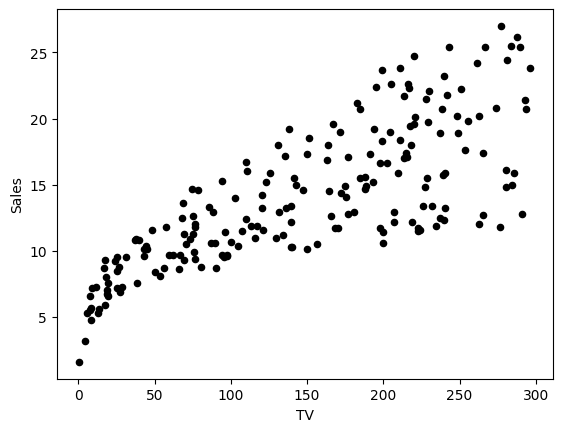

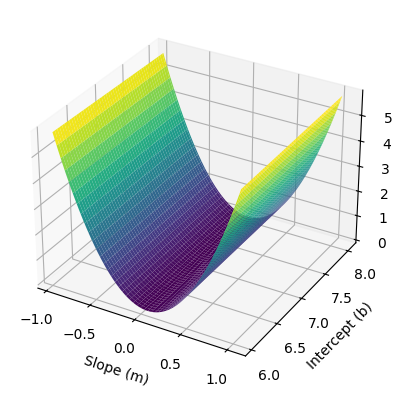

best m is -> -726340833525.1062
best b is -> -13.466451021217338
new loss value is -> 3.055226157461203e+30
best_m_from_adagrand is -> -0.2453565783804328


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

path = "/Users/apple/Code/Ann/ai/dataset/tvmarketing.csv"

### Start code 
adv = pd.read_csv(path)
adv.head()
adv.plot(x='TV', y='Sales', kind='scatter', c='black')

### Model
# Save the required field of the DataFrame into variable X and Y:
X = adv['TV']
Y = adv['Sales']

# You can use the function np.polyfit(x, y, deg) to fit a polynomial of degree deg to point (x, y), minimising
# the sum of squared errors. Taking deg = 1 you can obtain the slope m and the intercept b of the linear regression line:
"""
In the equation of a line 𝑦 = 𝑚𝑥 + 𝑏
   𝑚 is the slope.
   𝑏 is the intercept.
"""
m, b = np.polyfit(X, Y, 1)
print(f"Linear regression with NumPy. Slope: {m}. Intercept: {b}")

# Make predictions substituting the obtained slope and intercept coefficients into the equation Y = mx + b
def model(m, b, X:list) -> list:
   Y = m * X + b
   return Y

X_test = np.array([50, 120, 280])
Y_test = model(m, b, X_test)

print(f"TV marketing expenses:\n{X_test}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_test}")

# ----------------------------------------------------------------------------------------------------- #
### Loss function
def loss_func(Y:list, b, m, X:list) -> float:
   loss = sum((y - (b + m * x)) ** 2 for y, x in zip(Y, X))
   return loss
print("loss value is ->", loss_func(Y, b, m, X))
# ----------------------------------------------------------------------------------------------------- #

### Error surface plot 
m_values = np.linspace(m - 1, m + 1, 100)
b_values = np.linspace(b - 1, b + 1, 100)
M, B = np.meshgrid(m_values, b_values)
Z = np.array([[loss_func(Y, b, m, X) for m in m_values] for b in b_values])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, cmap='viridis')
ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Loss')
plt.show()
# ----------------------------------------------------------------------------------------------------- #

### Gradient Descent 
# to find the best value of b and m
# turn X, Y to pd.Series
SX = pd.Series(X)
SY = pd.Series(Y)

# partial derivative to m
def partial_derivative_m(m:float) -> float:
   derivative = -2 * ((SY - (b + m * SX)) * SX).sum()
   return derivative

# partial derivative to b
def partial_derivative_b(b:float) -> float:
   derivative = -2 * ((SY - (b + m * SX))).sum()
   return derivative

def recursive_find_best_m(old_m, der_fun, lr):
   if old_m <= 0.01:
      return old_m 
   new_m = old_m - lr * der_fun(old_m)
   return recursive_find_best_m(new_m, der_fun, lr)

def recursive_find_best_b(old_b, der_fun, lr):
   if old_b <= 0.01:
      return old_b 
   new_b = old_b - lr * der_fun(old_b)
   return recursive_find_best_m(new_b, der_fun, lr)

best_m = recursive_find_best_m(m, partial_derivative_m, lr=1)
best_b = recursive_find_best_m(b, partial_derivative_b, lr=1)

print("best m is ->", best_m)
print("best b is ->", best_b)
# From here, we see, we substantially decrease the loss value after applying Gradient Descent
print("new loss value is ->", loss_func(Y, best_b, best_m, X)) 

# -------------------------------------------------------------------------------------------------- #
# Adagrand
# w2 <- w1 - ada1/delta1 * g1
import math 

def adagrand(der_fun, old_der_val, lr, n, old_m) -> float:
   if old_m <= 0.001:
      return old_m
   delta = math.sqrt((der_fun(old_m) ** 2 + (old_der_val) ** 2))
   new_m = old_m - ((lr / delta) * der_fun(old_m))
   n += 1
   return adagrand(der_fun, der_fun(old_m), lr, n, new_m)

m, b = np.polyfit(X, Y, 1)

best_m_from_ada = adagrand(
   partial_derivative_m,
   partial_derivative_m(m),
   lr = 1,
   n = 1,
   old_m = m
)
print("best_m_from_adagrand is ->", best_m_from_ada)